In [1]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, matplotlib >= 2.0
"""

import sys
import os
import numpy   as np

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import cantera as ct

from scipy.integrate import solve_ivp

In [2]:
##########################################################################################
### Input Data

OutputDir          = WORKSPACE_PATH + '/ROMNet/Data_100DReact/'
FigDir             = OutputDir + '/fig/'

MixtureFile        = 'gri30.yaml'
NTs                = 10
T0Vec              = np.logspace(np.log10(300), np.log10(3000), NTs) # [2.e-5]
NPerT0             = 3000

tStratch           = 1.
Nt                 = NPerT0*2

P0Inlet            = ct.one_atm
EqRatioInlet       = 1.
##########################################################################################

In [3]:
def IdealGasConstPressureReactor_SciPY(t, y):
    print(t)

    YEnd     = np.array([1.-np.sum(y[1:])], dtype=np.float64)
    Y        = np.concatenate((y[1:], YEnd), axis=0)
    gas_.TPY = y[0], P_, Y
    
    wdot     = gas_.net_production_rates

    ydot     = np.zeros_like(y, dtype=np.float64)
    ydot[0]  = - np.dot(wdot, gas_.partial_molar_enthalpies) / gas_.cp / gas_.density
    ydot[1:] = wdot[0:-1] * gas_.molecular_weights[0:-1] / gas_.density
    
    return ydot


def IdealGasReactor_SciPY(t, y):
    print(t)

    YEnd     = np.array([1.-np.sum(y[1:])], dtype=np.float64)
    Y        = np.concatenate((y[1:], YEnd), axis=0)
    gas_.TDY = y[0], density_, Y
    
    wdot     = gas_.net_production_rates

    ydot     = np.zeros_like(y, dtype=np.float64)
    ydot[0]  = - np.dot(wdot, gas_.partial_molar_int_energies) / gas_.cv / density_
    ydot[1:] = wdot[0:-1] * gas_.molecular_weights[0:-1] / density_
    
    return ydot

In [4]:
gas     = ct.Solution('gri30.cti')
gas.TPX = 1250, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'

In [5]:
T0      = 900
gas.TPX = T0, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'
r       = ct.IdealGasReactor(gas)
sim     = ct.ReactorNet([r])

gas_    = gas
mass_   = r.mass
density_= r.density

y0      = np.array(np.hstack((gas_.T, gas_.Y[0:-1])), dtype=np.float64)

In [6]:
tMin     = 1.e-1
tMax     = 1e1
dt0      = 1.e-2
tStratch = 1.05
tVec     = [0.0]
t        = tMin
dt       = dt0
while (t <= tMax):
    tVec.append(t)
    t  =   t + dt
    dt = dt0 * tStratch
rtol       = 1.e-8
SOLVER     = 'BDF'#'RK23'#'BDF'#'Radau'

In [7]:
states     = ct.SolutionArray(gas, 1, extra={'t': [0.0]})
output     = solve_ivp( IdealGasReactor_SciPY, (tVec[0],tVec[-1]), y0, method=SOLVER, t_eval=tVec, rtol=rtol )

0.0
2555.179227618452
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.9904835315850013e-05
1.9904835315850013e-05
3.9809670631700025e-05
3.9809670631700025e-05
0.00023885802379020014
0.00023885802379020014
0.0004379063769487003
0.0004379063769487003
0.002428389908533702
0.002428389908533702
0.004418873440118704
0.004418873440118704
0.024323708755968725
0.024323708755968725
0.024323708755968725
0.04422854407181875
0.04422854407181875
0.04422854407181875
0.04422854407181875
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.0696066041865579
0.06960

0.2980377189650609
0.2980377189650609
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441298344
0.4458599441

0.37956975716347513
0.3794558586949365
0.3794558586949365
0.3793989094606671
0.3793989094606671
0.3793704348435325
0.3793704348435325
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.3793989094606672
0.379398909

1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7876676598233325
1.7876676598233325
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945593277
1.7879753945

2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.526135491984272
2.7611202022397046
2.7611202022397046
2.7611202022397046
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.996104912495137
2.99610

3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.501340461514749
3.50134046

4.202960121865373
4.202960121865373
4.3427649308887215
4.3427649308887215
4.3427649308887215
4.48256973991207
4.48256973991207
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.622374548935419
4.6223745

6.048169718937009
6.048169718937009
6.048141410607955
6.048141410607955
6.048127256443427
6.048127256443427
6.048120179361164
6.048120179361164
6.048127256443427
6.048127256443427
6.048134333525691
6.048134333525691
6.048141410607954
6.048141410607954
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.048212181430587
6.04821218

6.391725369321044
6.391725369321044
6.391725369321044
6.391725369321044
6.389343048538204
6.389343048538204
6.388151888146783
6.388151888146783
6.3875563079510735
6.3875563079510735
6.387258517853219
6.387258517853219
6.387109622804291
6.387109622804291
6.387035175279827
6.387035175279827
6.386997951517595
6.386997951517595
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035175279827
6.387035

6.563268423717007
6.563268423717007
6.563268423717007
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.583212622723886
6.58321262

6.774581127447169
6.774581127447169
6.774581127447169
6.7740904049014885
6.7740904049014885
6.773845043628649
6.773845043628649
6.7737223629922285
6.7737223629922285
6.773661022674018
6.773661022674018
6.773630352514913
6.773630352514913
6.773615017435361
6.773615017435361
6.773607349895585
6.773607349895585
6.773615017435361
6.773615017435361
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.7736226849751375
6.773622

6.794374277292986
6.794374277292986
6.794385477297279
6.794385477297279
6.794396677301572
6.794396677301572
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.794508677344501
6.79450867

6.858217063885077
6.858156655494758
6.858156655494758
6.858126451299599
6.858126451299599
6.858111349202019
6.858111349202019
6.858103798153229
6.858103798153229
6.858100022628834
6.858100022628834
6.85810379815323
6.85810379815323
6.858107573677625
6.858107573677625
6.85811134920202
6.85811134920202
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445974
6.858149104445

6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503614810789065
6.9503781998806335
6.9503781998806335
6.950394918682361
6.95039491868

6.9856392509947245
6.9856392509947245
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261103879
6.98564261

7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.013003040407163
7.014928338823422
7.014928338823422
7.016853637239681
7.016853637239681
7.016163237135546
7.016163237135546
7.016163237135546
7.017398135447669
7.017398135447669
7.017398135447669
7.018633033759793
7.018633033759793
7.018633033759793
7.019867932071916
7.019867932071916
7.019867932071916
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.021207294546612
7.02120729

7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.04043078892924
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.040432299827668
7.04043

7.046343079198706
7.046343079198706
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.046536151658068
7.04653615

7.047417187717306
7.047417187717306
7.047498705413934
7.047498705413934
7.047580223110563
7.047580223110563
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.047661740807191
7.04766174

7.048760601063165
7.048760601063165
7.048761516245896
7.048761516245896
7.048762431428626
7.048762431428626
7.048763346611357
7.048763346611357
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.048768057151489
7.04876805

7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049154819698216
7.049156567763703
7.049156567763703
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.049161083304395
7.04916108

7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.049219490611793
7.0492301663326105
7.0492301663326105
7.0492301663326105
7.0492301663326105
7.0492301663326105
7.0492301663326105
7.0492301663326105
7.0492301663326105
7.0492301663326105
7.0492301663326105
7.0492301663326105
7.0492301663326105
7.04923016633261

7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.049309638142315
7.0493083358551925
7.0493083358551925
7.049307684711631
7.049307684711631
7.049307359139851
7.049307359139851
7.04930719635396
7.0493071

7.049487809735883
7.049487809735883
7.049487809735883
7.049487689490043
7.049487689490043
7.049487809735883
7.049487809735883
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.049487929981723
7.04948792

7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.049504345738739
7.04950434

7.049505201872248
7.049505201872248
7.049505232297168
7.049505232297168
7.049505262722088
7.049505262722088
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.049505566971292
7.04950556

7.049533102753113
7.049533102753113
7.049533921523888
7.049533921523888
7.049534740294662
7.049534740294662
7.049535559065437
7.049535559065437
7.049536377836212
7.049536377836212
7.049536377836212
7.049536149712439
7.049536149712439
7.049536149712439
7.049536149712439
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944
7.04953674035944

7.0495448622193155
7.0495448622193155
7.049545011686916
7.049545011686916
7.049545161154516
7.049545161154516
7.049545310622116
7.049545310622116
7.049545310622116
7.049545485939757
7.049545485939757
7.049545485939757
7.049545661257398
7.049545661257398
7.049545661257398
7.04954583657504
7.04954583657504
7.04954583657504
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011892681
7.049546011

7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.049550504436993
7.0495504455271085
7.0495504455271085
7.049550504436993
7.049550504436993
7.049550504436993
7.049550563346877
7.049550563346877
7.049550563346877
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550622256761
7.049550

7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551978202832
7.049551846976719
7.049551846976719
7.049551781363663
7.049551781363663
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.049551846976719
7.04955184

7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.049552393105563
7.0495523618056355
7.0495523618056355
7.0495523461556715
7.0495523461556715
7.04955233833069
7.04955233833069
7.04955233833069
7.0495523461556715
7.0495523461556715
7.049552353980653
7.04955

7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.0495533410584255
7.049553386894649
7.049553386894649
7.049553432730873
7.049553432730873
7.049553432730873
7.049553432730873
7.049553432730873
7.049553432730873
7.049553432730873
7.049553432730873
7.0

7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553782321626
7.049553768333517
7.049553768333517
7.049553782321626
7.049553782321626
7.049553782321626
7.049553796309734
7.049553796309734
7.049553796309734
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.049553936190819
7.04955393

7.049554312830556
7.049554312830556
7.049554226535744
7.049554226535744
7.049554183388337
7.049554183388337
7.049554161814633
7.049554161814633
7.049554151027782
7.049554151027782
7.049554145634357
7.049554145634357
7.049554151027783
7.049554151027783
7.049554156421209
7.049554156421209
7.049554161814635
7.049554161814635
7.049554215748897
7.049554215748897
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.049554269683158
7.04955426

7.049554745975406
7.049554740653412
7.049554740653412
7.049554745975406
7.049554745975406
7.049554751297401
7.049554751297401
7.049554756619395
7.049554756619395
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.049554809839339
7.04955480

7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555535392574
7.049555561911033
7.049555561911033
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.049555827095627
7.04955582

7.049556242903993
7.049556193378292
7.049556193378292
7.049556168615441
7.049556168615441
7.049556193378291
7.049556193378291
7.0495562181411415
7.0495562181411415
7.049556242903992
7.049556242903992
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556490532496
7.049556

7.049557242000801
7.049557242000801
7.049557242000801
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.04955727152041
7.049557271

7.0495583516631335
7.0495583516631335
7.0495583516631335
7.0495583516631335
7.0495583516631335
7.0495583516631335
7.0495583516631335
7.0495583516631335
7.0495583516631335
7.0495583516631335
7.0495583516631335
7.0495583516631335
7.049558183508319
7.049558183508319
7.049558099430912
7.049558099430912
7.049558099430912
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.049558183508319
7.04955818350831

7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558931551315
7.049558912159347
7.049558912159347
7.049558902463364
7.049558902463364
7.049558897615372
7.049558897615372
7.0495588951913755
7.0495588951913755
7.049558897615372
7.049558897615372
7.049558900039368
7.049558900039368
7.049558902463364
7.049558902463364
7.049558926703325
7.049558926703325
7.049558950943286
7.049558950943286
7.049558975183247
7.049558975183247
7.049559

7.0495597217861885
7.0495597217861885
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559937838471
7.049559

7.049561075043448
7.049561075043448
7.049561075043448
7.049561032037085
7.049561032037085
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.049561075043448
7.04956107

7.0495616675477235
7.0495616675477235
7.0495616675477235
7.0495616675477235
7.0495616675477235
7.0495616675477235
7.0495616675477235
7.0495616675477235
7.0495616675477235
7.049561639417325
7.049561639417325
7.049561667547723
7.049561667547723
7.04956169567812
7.04956169567812
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7.0495619199079895
7

7.04956324858523
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842052381
7.049563842

7.049565204356591
7.049565204356591
7.049564927427621
7.049564927427621
7.049564788963137
7.049564788963137
7.049564788963137
7.049564788963137
7.049564719730894
7.049564719730894
7.049564788963136
7.049564788963136
7.049564858195378
7.049564858195378
7.049564858195378
7.04956492742762
7.04956492742762
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.049565574373583
7.0495655743

7.04956594161544
7.04956594161544
7.04956594161544
7.04956598136023
7.04956598136023
7.0495660211050195
7.0495660211050195
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.049566302145005
7.04956630214

7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.049566900452795
7.04956690

7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.049570921368667
7.0495704564944734
7.0495704564944734
7.049570224057377
7.049570224057377
7.049570224057377
7.049570107838829
7.049570107838829
7.049570107838829
7.049570107838829
7.049570224057376
7.049570224057376
7.049570224057376
7.049570224057376
7.049570224057376
7.049570224057376
7.049570224057376
7.049570224057376
7.049570224057376
7.049570224057376
7.049570224057376
7.049570224057376
7.049570224057376
7.049570

7.049570872338959
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.049571202092938
7.04957120

7.049572901510278
7.049572901510278
7.049572995836693
7.049572995836693
7.049573090163107
7.049573090163107
7.049573184489521
7.049573184489521
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.049573978885336
7.04957397

7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.049576967254311
7.04957696

7.049579115884634
7.049579115884634
7.049579115884634
7.049579115884634
7.049579115884634
7.0495792205465735
7.0495792205465735
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579325208513
7.049579

7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888671435
7.0495809888

7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.049582362076517
7.04958236

7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049584956080296
7.049584956080296
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.049585210281492
7.04958521

7.0495877235174955
7.0495877235174955
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408923165
7.0495878408

7.049590144318222
7.049590144318222
7.049590144318222
7.049590144318222
7.049590144318222
7.049590144318222
7.0495898309503655
7.0495898309503655
7.0495898309503655
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225
7.0495901443182225

7.04959176359972
7.04959176359972
7.049591574663942
7.049591574663942
7.04959176359972
7.04959176359972
7.049591952535498
7.049591952535498
7.049591952535498
7.049592141471276
7.049592141471276
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942897
7.049593447942

7.049594539427883
7.049594539427883
7.049594462984078
7.049594462984078
7.049594424762175
7.049594424762175
7.049594462984077
7.049594462984077
7.049594462984077
7.049594501205979
7.049594501205979
7.049594539427881
7.049594539427881
7.049594539427881
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.049594921646902
7.04959492

7.049599244076312
7.049599271690396
7.049599271690396
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.04959954783124
7.049599547

7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049601066555684
7.049600840781542
7.049600840781542
7.049600727894472
7.049600727894472
7.049600671450936
7.049600671450936
7.049600727894471
7.049600727894471
7.049600727894471
7.049600727894471
7.049600727894471
7.049600727894471
7.049600727894471
7.049600727894471
7.049600727894471
7.049600727894471
7.049600727894471
7.049600727894471
7.04960072

7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.049602094004447
7.04960181840124
7.04960181840124
7.049601680599636
7.049601680599636
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.049601818401239
7.0496018184

7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603240460078
7.049603240460078
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.049603629807292
7.04960362

7.049605972888705
7.049605972888705
7.049606026799147
7.049606026799147
7.049606080709588
7.049606080709588
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355
7.0496063181655355

7.049609637464449
7.049609637464449
7.0496092250423565
7.0496092250423565
7.04960901883131
7.04960901883131
7.049608915725788
7.049608915725788
7.049608915725788
7.049608864173026
7.049608864173026
7.049608915725787
7.049608915725787
7.049608967278548
7.049608967278548
7.049609018831309
7.049609018831309
7.04960907038407
7.04960907038407
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.049609585911682
7.0496095859

7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.049615471633136
7.04961547

7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926347425
7.0496336926

7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.049636421887392
7.04963642

7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.049645367240351
7.04964519137391
7.04964519137391
7.04964519137391
7.049645103440691
7.049645103440691
7.04964519137391
7.04964519137391
7.04964527930713
7.04964527930713
7.04964536724035
7.04964536724035
7.04964536724035
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.049646246572548
7.

7.049660578376436
7.049660578376436
7.049660578376436
7.049660578376436
7.049660578376436
7.049660578376436
7.049660578376436
7.049660578376436
7.049660578376436
7.049660664487523
7.049660664487523
7.04966075059861
7.04966075059861
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.049661604601381
7.0496616046

7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496806894284685
7.0496810037

7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684031021375
7.049684070226986
7.049684070226986
7.049684109432597
7.049684109432597
7.049684501488709
7.049684501488709
7.049684893544821
7.049684893544821
7.049685285600933
7.049685285600933
7.049687331869534
7.049687331869534
7.049687331869534
7.049687331869534
7.049687331869534
7.049687331869534
7.049687331869534
7.049687331869534
7.049687331869534
7.049687331869534
7.04968733

7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.049725575234895
7.04972557

7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.04975382844662
7.049751090344

7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.049845987578553
7.04984598

7.049964257653649
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.0499660387888206
7.04996603878

7.0500354880151725
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.050075137689493
7.0500751

7.050277884867276
7.050277884867276
7.050277699382486
7.050277699382486
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.050277884867275
7.05027788

7.050394020556137
7.050394020556137
7.050392450130669
7.050392450130669
7.050391664917935
7.050391664917935
7.050392450130668
7.050392450130668
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.050393235343401
7.05039323

7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051238971384116
7.051295826543168
7.051295826543168
7.05135268170222
7.05135268170222
7.051485294246567
7.051485294246567
7.051617906790915
7.051617906790915
7.051750519335262
7.051750519335262
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.05188313187961
7.051

7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.054466684846788
7.0547471962689965
7.0547471962689965
7.0547471962689965
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.055027707691205
7.05502

7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.0576366344215025
7.057446197288973
7.057446197288973
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.057636634421503
7.0

7.077323170336731
7.077323170336731
7.077128141418552
7.077128141418552
7.077030626959462
7.077030626959462
7.0769818697299165
7.0769818697299165
7.076957491115144
7.076957491115144
7.076945301807758
7.076945301807758
7.076939207154065
7.076939207154065
7.076936159827218
7.076936159827218
7.076934636163795
7.076934636163795
7.0769338743320835
7.0769338743320835
7.076933493416227
7.076933493416227
7.0769333029583
7.0769333029583
7.076933207729336
7.076933207729336
7.076933160114854
7.076933160114854
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.076933207729336
7.07693320

7.87865052581993
7.87865052581993
7.87865052581993
7.87865052581993
7.87865052581993
7.87865052581993
7.87865052581993
7.87865052581993
7.87865052581993
7.87865052581993
7.87865052581993
7.87865052581993
7.87865052581993
7.565663703144528
7.565663703144528
7.409170291806827
7.409170291806827
7.330923586137978
7.330923586137978
7.291800233303553
7.291800233303553
7.2722385568863395
7.2722385568863395
7.262457718677734
7.262457718677734
7.257567299573431
7.257567299573431
7.255122090021279
7.255122090021279
7.253899485245203
7.253899485245203
7.253288182857165
7.253288182857165
7.252982531663147
7.252982531663147
7.252829706066137
7.252829706066137
7.252753293267633
7.252753293267633
7.252715086868379
7.252715086868379
7.252695983668753
7.252695983668753
7.2526864320689395
7.2526864320689395
7.252681656269033
7.252681656269033
7.25267926836908
7.25267926836908
7.252678074419103
7.252678074419103
7.252677477444115
7.252677477444115
7.2526771789566205
7.2526771789566205
7.252677029712874
7

In [8]:
### Integrate
time         = []
temperature  = []
mfrac        = []
HR           = []
it           = 0
for t in output.t:
    current_time = t
    time.append(current_time)
    temperature.append(output.y[0,it])
    YY       = np.concatenate((output.y[1:,it], [1.0-np.sum(output.y[1:,it])]), axis=0)
    gas_.TDY = output.y[0,it], density_, YY
    mfrac.append(YY)
    HR.append(- np.dot(gas_.net_production_rates, gas_.partial_molar_enthalpies))
    it+=1 
    
auto_ignition = time[HR.index(max(HR))]
Y             = np.vstack(mfrac)

print('Auto Ignition Delay = ', auto_ignition)

Auto Ignition Delay =  7.0400000000001


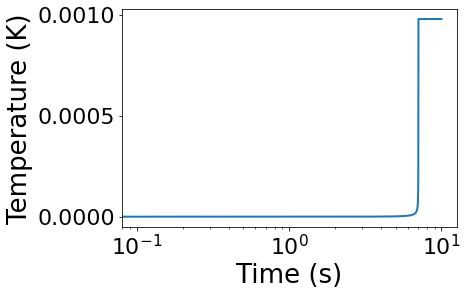

In [9]:
plt.plot(time, Y[:, gas.species_index('H2')])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

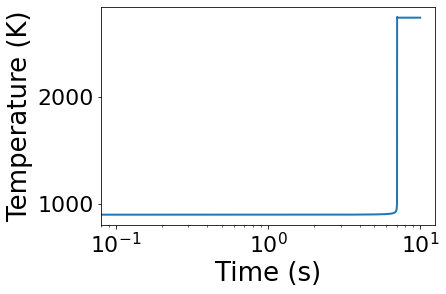

In [10]:
plt.plot(time, temperature)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

In [11]:
temperature[-1]

2740.6939413055275

In [12]:
EndSpecies = [gas.species_names[i] for i in range(gas.n_species) if (Y[1000,i]*100 > .01)]

IndexError: index 1000 is out of bounds for axis 0 with size 944

In [ ]:
EndSpecies

In [ ]:
len(temperature)